### Analysis of Historical Fundamentals - Castings Group plc. 

This report is structured as follows:

- Imported Packages
- Functions for financial calculations 
- Loading in data & ratio's
- Visualizations of Fundamentals


### Ratio's and Metrics Covered:

- [Return on Invested Capital](#Return_on_Invested_Capital)
- [Return on Assets](#Return_on_Assets)
- [Return on Equity](#Return_on_Equity)
- [Net Margin](#Net_Margin)
- [Gross Margin](#Gross_Margin)
- [Sales Growth](#Sales_Growth)
- [Net Debt](#Net_debt)
- [Book Value](#Book_Value)
- [FCF (Free Cash Flow)](#FCF) 
- [Cash returned to investors (Dividends per share)](#Dividends_per_share)

#### ** Values given in £'000s

### Packages used

In [91]:
import pandas as pd
import numpy as np
import matplotlib as plt
import os

from matplotlib import pyplot as plt
plt.style.use('ggplot')

### Fundamentals

In [92]:
def roic(nopat,invested_capital):
    roic=(nopat/invested_capital)*100
    return(roic)

#Invested Capital given by (Assets + Liabilities - Cash)

In [93]:
# Return on assets
def roa(net_income,total_assets):
    roa=(net_income/total_assets)*100
    return(roa)

In [94]:
#Return on Equity
def roe(net_income,shareholders_equity):
    roe=(net_income/shareholders_equity)*100
    return(roe)


In [95]:
# Net Margin
def net_margin(nopat,revenue):
    net_margin=(nopat/revenue)*100
    return(net_margin)

In [96]:
#Gross Margin 
def gross_margin(gross_profit,revenue):
    gross_margin=(gross_profit/revenue)*100
    return(gross_margin)

In [97]:
#sales growth - YoY change in sales(revenue) .pct_change()

#net_debt = (Short-term debt + Long-term debt (Total Liabilities) - (Cash)
#book_value = Total assets - Total Liabilities 
# Free cash flow = FCF = Net cash from operations – Capex (Capital Expenditure)
# Cash Return to shareholders = ' Payout per share in (pence)'


### Loading in Data and Analysis

In [98]:
#Set working directory
#os.chdir('/Users/mattcirelli/Desktop/Havelock London/')

In [99]:
df = pd.read_excel('/Users/mattcirelli/Desktop/Havelock London/Castings Group Fundamentals.xlsx',index_col='Year')

In [100]:
df.index = pd.to_datetime(df.index, format='%Y')

In [101]:
df.head(10)

,Revenue,Gross Profit,Profit From Operations(EBITDA),Profit before income tax(EBIT),Profit for the year(Net profit),Total Comprehensive Income(nopat),Total Assets,Current liabilities,Total liabilities,Invested Capital,Shareholders Equity,operating cash,Net Cash,capex,dividends,Book Values,Payout per share (pence)
Year,,,,,,,,,,,,,,,,,
2019-01-01,150236,32107,15197,15325,12285,11010,163934,24222,29545,163934,134389,18236,15637,5300,6327,71438,14.78
2018-01-01,133276,29602,11944,12077,9689,9798,155367,22242,27225,155367,128142,17417,14338,11200,6095,75448,14.50
2017-01-01,118822,30188,15678,15915,13004,13282,149919,21721,25775,149919,124144,21531,18325,14200,19072,72762,13.97
2016-01-01,132448,34017,19490,19676,16187,16477,153109,18789,23176,153109,129933,27773,24736,7200,5873,66948,13.71
2015-01-01,131270,32118,17410,17547,13875,14114,144055,19938,24726,144055,119329,20359,16051,8200,5694,66572,13.30
2014-01-01,137466,36042,21649,21833,17258,14261,138871,23691,27962,138871,110909,23901,19213,9700,5450,65195,12.96
2013-01-01,122215,31736,18851,19157,14786,14651,129792,22636,27694,129792,102098,22466,17826,6900,5157,61676,12.34
2012-01-01,126271,33613,22937,23093,17591,17267,120027,21846,27423,120027,92604,25453,21448,12600,4778,62226,11.75
2011-01-01,105368,27842,15343,15501,11652,11243,112421,26659,32306,112421,80115,15191,13707,9860,4363,55889,10.75


In [102]:
# Update terms for correct accounting definitions
df['Invested Capital'] = df['Invested Capital'] - df['Net Cash']
df.rename(columns={'Book Values':'Book Value'},inplace=True)
df['Book Value']=df['Shareholders Equity']

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11 entries, 2019-01-01 to 2009-01-01
Data columns (total 18 columns):
Revenue                              11 non-null int64
Gross Profit                         11 non-null int64
Profit From Operations(EBITDA)       11 non-null int64
Profit before income tax(EBIT)       11 non-null int64
Profit for the year(Net profit)      11 non-null int64
Total Comprehensive Income(nopat)    11 non-null int64
Total Assets                         11 non-null int64
Current liabilities                  11 non-null int64
Total liabilities                    11 non-null int64
Invested Capital                     11 non-null int64
Shareholders Equity                  11 non-null int64
operating cash                       11 non-null int64
Net Cash                             11 non-null int64
capex                                11 non-null int64
dividends                            11 non-null int64
Book Values                          11 non-null int

In [104]:
df.columns

Index(['Revenue', 'Gross Profit', 'Profit From Operations(EBITDA)',
       'Profit before income tax(EBIT)', 'Profit for the year(Net profit)',
       'Total Comprehensive Income(nopat)', 'Total Assets',
       'Current liabilities', 'Total liabilities', 'Invested Capital',
       'Shareholders Equity', 'operating cash ', 'Net Cash', 'capex',
       'dividends', 'Book Values ', 'Payout per share (pence)', 'Book Value'],
      dtype='object')

In [105]:
# Analyze 10 Years of data
df=df.iloc[:10]

In [106]:
#convert intergers to floats
for column in df:
    df[column] = df[column].astype(float)


### Visualizations of Fundamentals

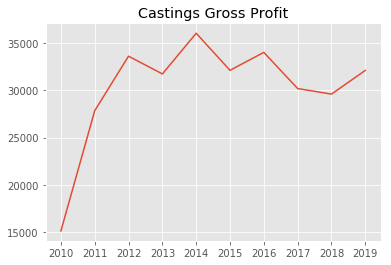

In [107]:
# Gross Profit
plt.plot(df['Gross Profit'])
plt.title('Castings Gross Profit')
plt.show()

<a id='Return_on_Invested_Capital'></a>
#### Return on Invested Capital

In [108]:
#Calculate return on invested capital
df['roic']=roic(df['Total Comprehensive Income(nopat)'],df['Invested Capital'])
df.roic

Year
2019-01-01     7.424290
2018-01-01     6.947507
2017-01-01    10.093165
2016-01-01    12.835254
2015-01-01    11.026218
2014-01-01    11.918133
2013-01-01    13.085222
2012-01-01    17.515901
2011-01-01    11.389469
2010-01-01     4.960591
Name: roic, dtype: float64

Text(0.5,1,'Return on Invested Capital ')

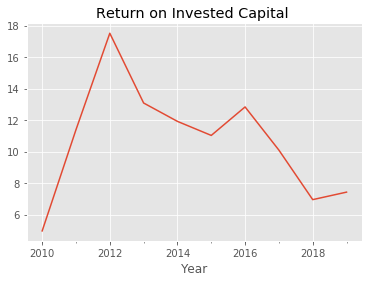

In [109]:
df.roic.plot()
plt.title('Return on Invested Capital ')

<a id='Return_on_Assets'></a>
#### Return on Assets

In [110]:
# Calculate Return on assets
df['roa']=roa(df['Profit for the year(Net profit)'],df['Total Assets'])
df.roa

Year
2019-01-01     7.493869
2018-01-01     6.236202
2017-01-01     8.674017
2016-01-01    10.572207
2015-01-01     9.631738
2014-01-01    12.427361
2013-01-01    11.392073
2012-01-01    14.655869
2011-01-01    10.364612
2010-01-01     8.146244
Name: roa, dtype: float64

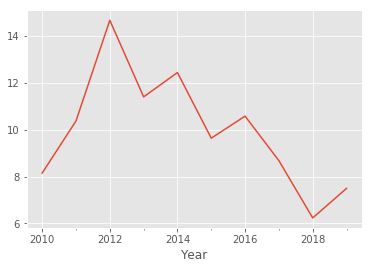

In [111]:
df.roa.plot()

<a id='Return_on_Equity'></a>
#### Return on Equity

In [112]:
# Calculate Return on Equity
df['roe']=roe(df['Profit for the year(Net profit)'],df['Shareholders Equity'])
df.roe

Year
2019-01-01     9.141373
2018-01-01     7.561143
2017-01-01    10.474932
2016-01-01    12.457959
2015-01-01    11.627517
2014-01-01    15.560505
2013-01-01    14.482164
2012-01-01    18.995940
2011-01-01    14.544093
2010-01-01    10.429439
Name: roe, dtype: float64

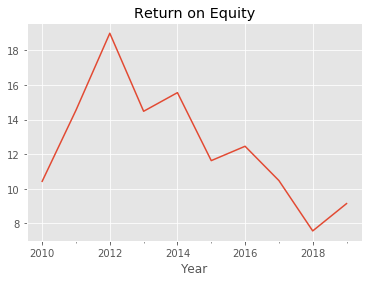

In [113]:
df.roe.plot(title='Return on Equity')

<a id='Net_Margin'></a>
#### Net Margin

Year
2019-01-01     7.328470
2018-01-01     7.351661
2017-01-01    11.178065
2016-01-01    12.440354
2015-01-01    10.751885
2014-01-01    10.374202
2013-01-01    11.987890
2012-01-01    13.674557
2011-01-01    10.670222
2010-01-01     6.465069
Name: net_margin, dtype: float64


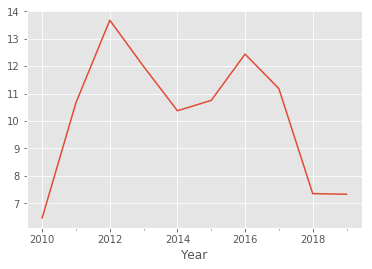

In [114]:
# Calculate Net Margin
df['net_margin']=net_margin(df['Total Comprehensive Income(nopat)'],df['Revenue'])
print(df.net_margin)
df.net_margin.plot()


<a id='Gross_Margin'></a>
#### Gross Margin

In [115]:
# Calculate Gross Margin
df['gross_margin']=gross_margin(df['Gross Profit'],df['Revenue'])
print(df.gross_margin)


Year
2019-01-01    21.371043
2018-01-01    22.211051
2017-01-01    25.406070
2016-01-01    25.683287
2015-01-01    24.467129
2014-01-01    26.218847
2013-01-01    25.967353
2012-01-01    26.619731
2011-01-01    26.423582
2010-01-01    24.940230
Name: gross_margin, dtype: float64


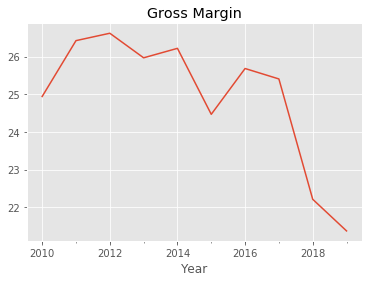

In [116]:
df.gross_margin.plot(title='Gross Margin')


<a id='Sales_Growth'></a>
#### Sales Growth

In [117]:
# Calculate Sales Growth, through percentage change with previous year 
df['sales_growth']=(df['Revenue'].pct_change(-1))*100
print(df.sales_growth)


Year
2019-01-01    12.725472
2018-01-01    12.164414
2017-01-01   -10.287811
2016-01-01     0.897387
2015-01-01    -4.507296
2014-01-01    12.478828
2013-01-01    -3.212139
2012-01-01    19.838091
2011-01-01    73.734109
2010-01-01          NaN
Name: sales_growth, dtype: float64


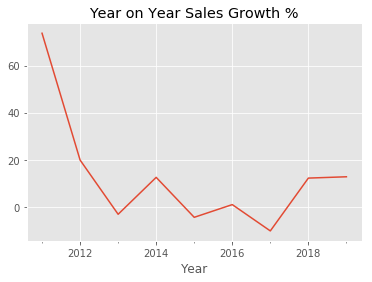

In [118]:
df.sales_growth.plot(title = 'Year on Year Sales Growth %')

<a id='Net_debt'></a>
#### Net Debt

In [119]:
# Net Debt calculated through adding liabilites and subtracting cash
df['net_debt']= df['Total liabilities']-df['Net Cash']
print(df.net_debt)


Year
2019-01-01    13908.0
2018-01-01    12887.0
2017-01-01     7450.0
2016-01-01    -1560.0
2015-01-01     8675.0
2014-01-01     8749.0
2013-01-01     9868.0
2012-01-01     5975.0
2011-01-01    18599.0
2010-01-01     5808.0
Name: net_debt, dtype: float64


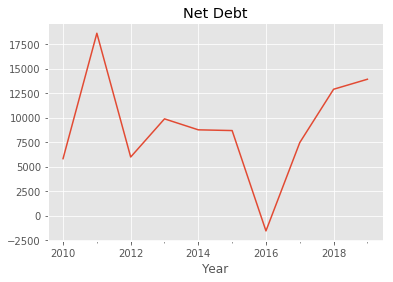

In [120]:
df.net_debt.plot(title='Net Debt')

<a id='FCF'></a>
#### Free Cash Flow

In [121]:
#Free Cash flow = Net cash flow - capital expenditure
df['FCF']= df['Net Cash']-df['capex']


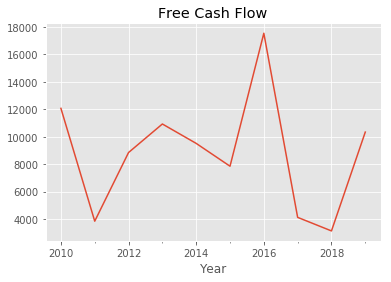

In [122]:
df.FCF.plot(title='Free Cash Flow')

Year
2019-01-01     7.920756
2018-01-01     6.614200
2017-01-01     9.058363
2016-01-01    11.161471
2015-01-01    10.396312
2014-01-01    13.086739
2013-01-01    12.164256
2012-01-01    15.661580
2011-01-01    10.710510
2010-01-01     8.578403
Name: roce, dtype: float64


Text(0.5,1,'ROCE')

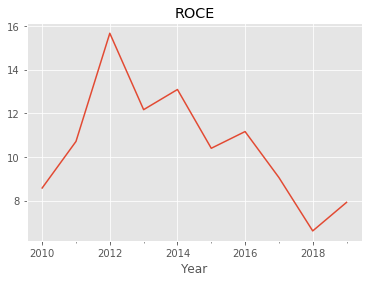

In [123]:
# Return on Capital Employed
df['roce']= roa(df['Profit before income tax(EBIT)'],(df['Total Assets']+ df['Total liabilities']))
print(df.roce)
df.roce.plot()
plt.title('ROCE')

<a id='Book_Value'></a>
#### Book Value

Text(0.5,1,'Book Value')

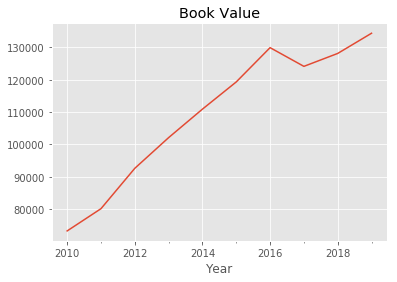

In [124]:
# Net Book value overtime
df['Book Value'].plot()
plt.title('Book Value')

<a id='Dividends_per_share'></a>
#### Cash Return to Shareholders

Text(0.5,1,'Cash Returned to Shareholders')

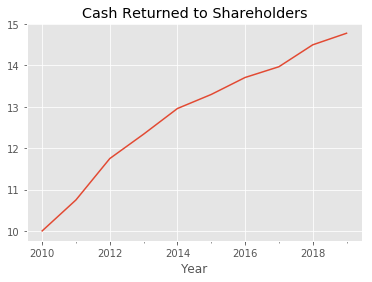

In [125]:
#payout per share
df['Payout per share (pence)'].plot()
plt.title('Cash Returned to Shareholders')